In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import cv2

**Loading the data**

In [4]:
data_dir = r"D:\My Work\Syllabus\SDGP\Datasets\OriginalProject\Project\Apples"

In [5]:
path = os.path.join(data_dir,"OldApproach")

In [6]:
print(os.path.exists(path))

True


In [7]:
train_dir = os.path.join(path,"Train")
test_dir = os.path.join(path,"Test")

In [8]:
train_good_apples = os.path.join(train_dir,"Good apples")
train_bad_apples = os.path.join(train_dir,"Bad apples")
test_good_apples = os.path.join(test_dir,"Good apples")
test_bad_apples = os.path.join(test_dir,"Bad apples")

**Understanding the data**

In [9]:
num_good_apples_train = len(os.listdir(train_good_apples))
num_bad_apples_train = len(os.listdir(train_bad_apples))
num_good_apples_test = len(os.listdir(test_good_apples))
num_bad_apples_test = len(os.listdir(test_bad_apples))

total_train_apples = num_good_apples_train + num_bad_apples_train
total_test_apples = num_good_apples_test + num_bad_apples_test

In [10]:
print('Total training Good apples: ', num_good_apples_train)
print('Total training Bad apples: ', num_bad_apples_train)

print('Total testing Good apples: ', num_good_apples_test)
print('Total testing Bad apples: ', num_bad_apples_test)
print("--")
print("Total training apples: ", total_train_apples)
print("Total testing apples: ", total_test_apples)

Total training Good apples:  1693
Total training Bad apples:  2342
Total testing Good apples:  395
Total testing Bad apples:  601
--
Total training apples:  4035
Total testing apples:  996


In [11]:
size = 32
epochs = 15
IMG_HEIGHT = 100
IMG_WIDTH = 100

**Preparing the data**

In [12]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for training data
test_image_generator = ImageDataGenerator(rescale=1./255) # Generator for testing data

In [13]:
train_gen = train_image_generator.flow_from_directory(batch_size = size, directory = train_dir, shuffle = True, target_size = (IMG_HEIGHT,IMG_WIDTH), class_mode = 'binary')

Found 4035 images belonging to 2 classes.


In [14]:
test_gen = test_image_generator.flow_from_directory(batch_size = size, directory = test_dir, target_size = (IMG_HEIGHT,IMG_WIDTH), class_mode = 'binary')

Found 996 images belonging to 2 classes.


**Creating the model**

In [15]:
model = Sequential([
        Conv2D(16,3,padding='same',activation='relu',input_shape=(IMG_HEIGHT,IMG_WIDTH,3)),
        MaxPooling2D(),
        Conv2D(32,3,padding='same',activation='relu'),
        MaxPooling2D(),
        Conv2D(64,3,padding='same',activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(512,activation='relu'),
        Dense(1)
    ])

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0

**Training the data**

In [18]:
history = model.fit_generator(
    train_gen,
    steps_per_epoch=total_train_apples,
    epochs=epochs,
    validation_data=test_gen,
    validation_steps=total_test_apples
)

Epoch 1/15
4035/4035 [==============================] - 2222s 551ms/step - loss: 0.0743 - accuracy: 0.9670 - val_loss: 0.0504 - val_accuracy: 0.9900
Epoch 2/15
4035/4035 [==============================] - 1386s 343ms/step - loss: 2.6806e-05 - accuracy: 1.0000 - val_loss: 0.0519 - val_accuracy: 0.9899
Epoch 3/15
4035/4035 [==============================] - 1271s 315ms/step - loss: 1.6651e-06 - accuracy: 1.0000 - val_loss: 0.0544 - val_accuracy: 0.9910
Epoch 4/15
4035/4035 [==============================] - 1722s 427ms/step - loss: 1.6389e-07 - accuracy: 1.0000 - val_loss: 0.0559 - val_accuracy: 0.9910
Epoch 5/15
4035/4035 [==============================] - 1775s 440ms/step - loss: 1.9214e-08 - accuracy: 1.0000 - val_loss: 0.0583 - val_accuracy: 0.9910
Epoch 6/15
4035/4035 [==============================] - 1774s 440ms/step - loss: 2.7443e-09 - accuracy: 1.0000 - val_loss: 0.0626 - val_accuracy: 0.9909
Epoch 7/15
4035/4035 [==============================] - 2085s 517ms/step - loss: 4.802

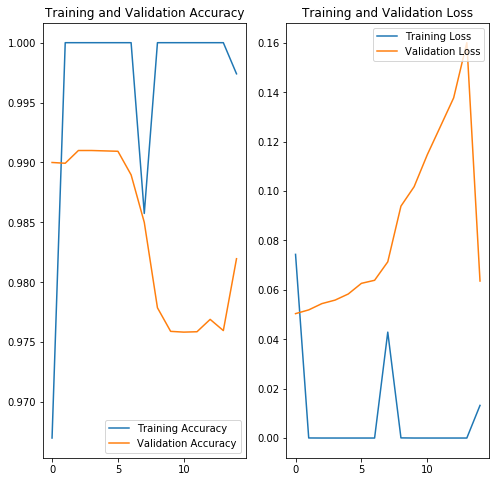

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')

plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [20]:
# def prepare(filepath):
#     IMG_SIZE = 100
#     img_array = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
#     new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
#     return new_array.reshape(-3,IMG_SIZE,IMG_SIZE,3)
# prep_file = 'apple_1.jpg'
# prep_file = tf.cast(prep_file, tf.float32)
# prediction = model.predict([prepare(prep_file)])
# print(prediction)